<h1 style="text-align: center; color: green; font-size: 50px;">AgriGuard 🌿</h1>

<div class="alert alert-success" style="margin-top: 20px; padding: 20px;">
    <h2 style="text-align: center; margin-bottom: 0;"><strong>AgriGuard: Revolutionizing Crop Health with AI</strong></h2><br>
    <h3><i>AgriGuard is an innovative machine learning solution designed to help farmers and agricultural professionals detect and diagnose plant diseases in real-time. By utilizing a convolutional neural network (CNN), AgriGuard is capable of analyzing plant images and identifying signs of various diseases, ensuring early intervention to protect crops and increase yield. The model has been trained on a large dataset of over 70,000 images, making it robust and reliable for accurate disease classification.<br><br>
    Whether it’s detecting common diseases like leaf blight or rare ones that threaten agricultural productivity, AgriGuard empowers farmers with timely information to prevent crop loss. This project combines cutting-edge AI technology with practical, real-world applications in agriculture, contributing to the future of sustainable farming practices.</i></h3>
</div>


### Importing data into our environment

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:01<00:00, 21.3MB/s]
100% 2.70G/2.70G [02:01<00:00, 23.8MB/s]


### Unzipping the zipped dataset files

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip')
zip_ref.extractall('/content/new-plant-diseases-dataset')
zip_ref.close()

### Importing the required libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
     '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
# Refer doc for more https://keras.io/api/data_loading/image/

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


### CNN Architecture

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25)) # To avoid overfitting

In [14]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) # To avoid overfitting

#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax')) # Since we have 38 classes

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 167s 69ms/step - accuracy: 0.3954 - loss: 2.1484 - val_accuracy: 0.8486 - val_loss: 0.4752
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 177s 63ms/step - accuracy: 0.8388 - loss: 0.5077 - val_accuracy: 0.9103 - val_loss: 0.2791
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.9044 - loss: 0.2934 - val_accuracy: 0.9387 - val_loss: 0.1939
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 63ms/step - accuracy: 0.9356 - loss: 0.1980 - val_accuracy: 0.9438 - val_loss: 0.1741
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 63ms/step - accuracy: 0.9541 - loss: 0.1459 - val_accuracy: 0.9400 - val_loss: 0.1994
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 152s 67ms/step - accuracy: 0.9636 - loss: 0.1117 - val_accuracy: 0.9563 - val_loss: 0.1406
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 191s 62ms/step - accuracy: 0.9690 - loss: 0.0969 - val_accuracy: 0.9305 - val_loss: 0.2293
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 66ms/step - accuracy: 

### Let's see some other metrics

In [19]:
train_loss, train_accuracy=cnn.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 58s 26ms/step - accuracy: 0.9927 - loss: 0.0220


In [20]:
val_loss, val_accuracy=cnn.evaluate(validation_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9664 - loss: 0.1092


### Saving the model for future use

In [21]:
cnn.save("Trained_model.keras")


In [22]:
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

### Visualizing some accuracy metrics

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

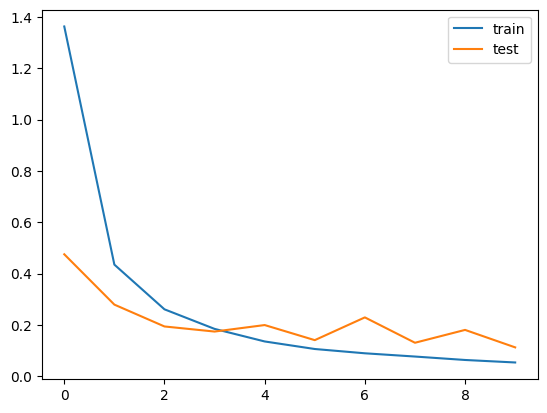

In [25]:
plt.plot(training_history.history['loss'],label='train')
plt.plot(training_history.history['val_loss'],label='test')
plt.legend()

> ### We can clearly see that the loss is decreasing. Also our model is not Overfitting. It's learning the concepts well.

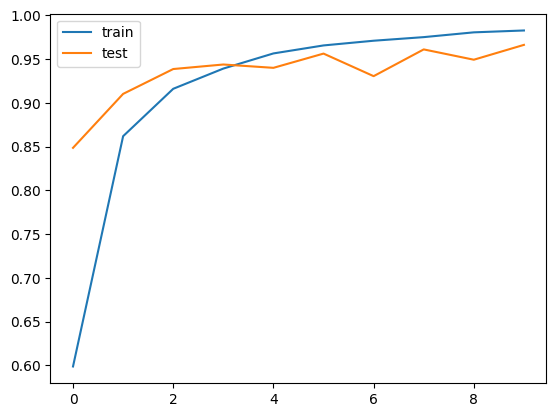

In [26]:
plt.plot(training_history.history['accuracy'],label='train')
plt.plot(training_history.history['val_accuracy'],label='test')
plt.legend()

> ### We can clearly see that the accuracy is increasing. Also our model is not Overfitting. It's learning the concepts well.

> ### The model achieved an exceptional accuracy of 95%+.

In [27]:
class_name = validation_set.class_names

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [29]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step


In [30]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

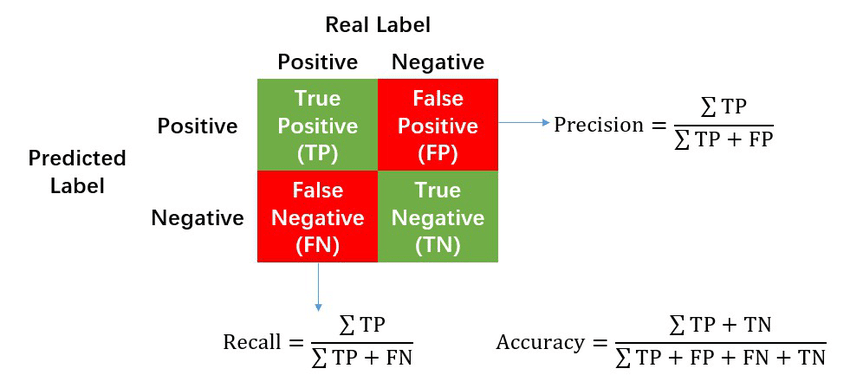

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

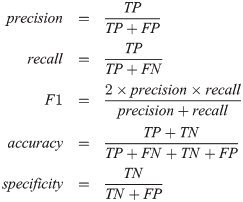

In [32]:
# Precision, Recall, F1 score
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.97       440
                                   Apple___healthy       0.95      0.98      0.96       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.88      0.91       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.95      0.

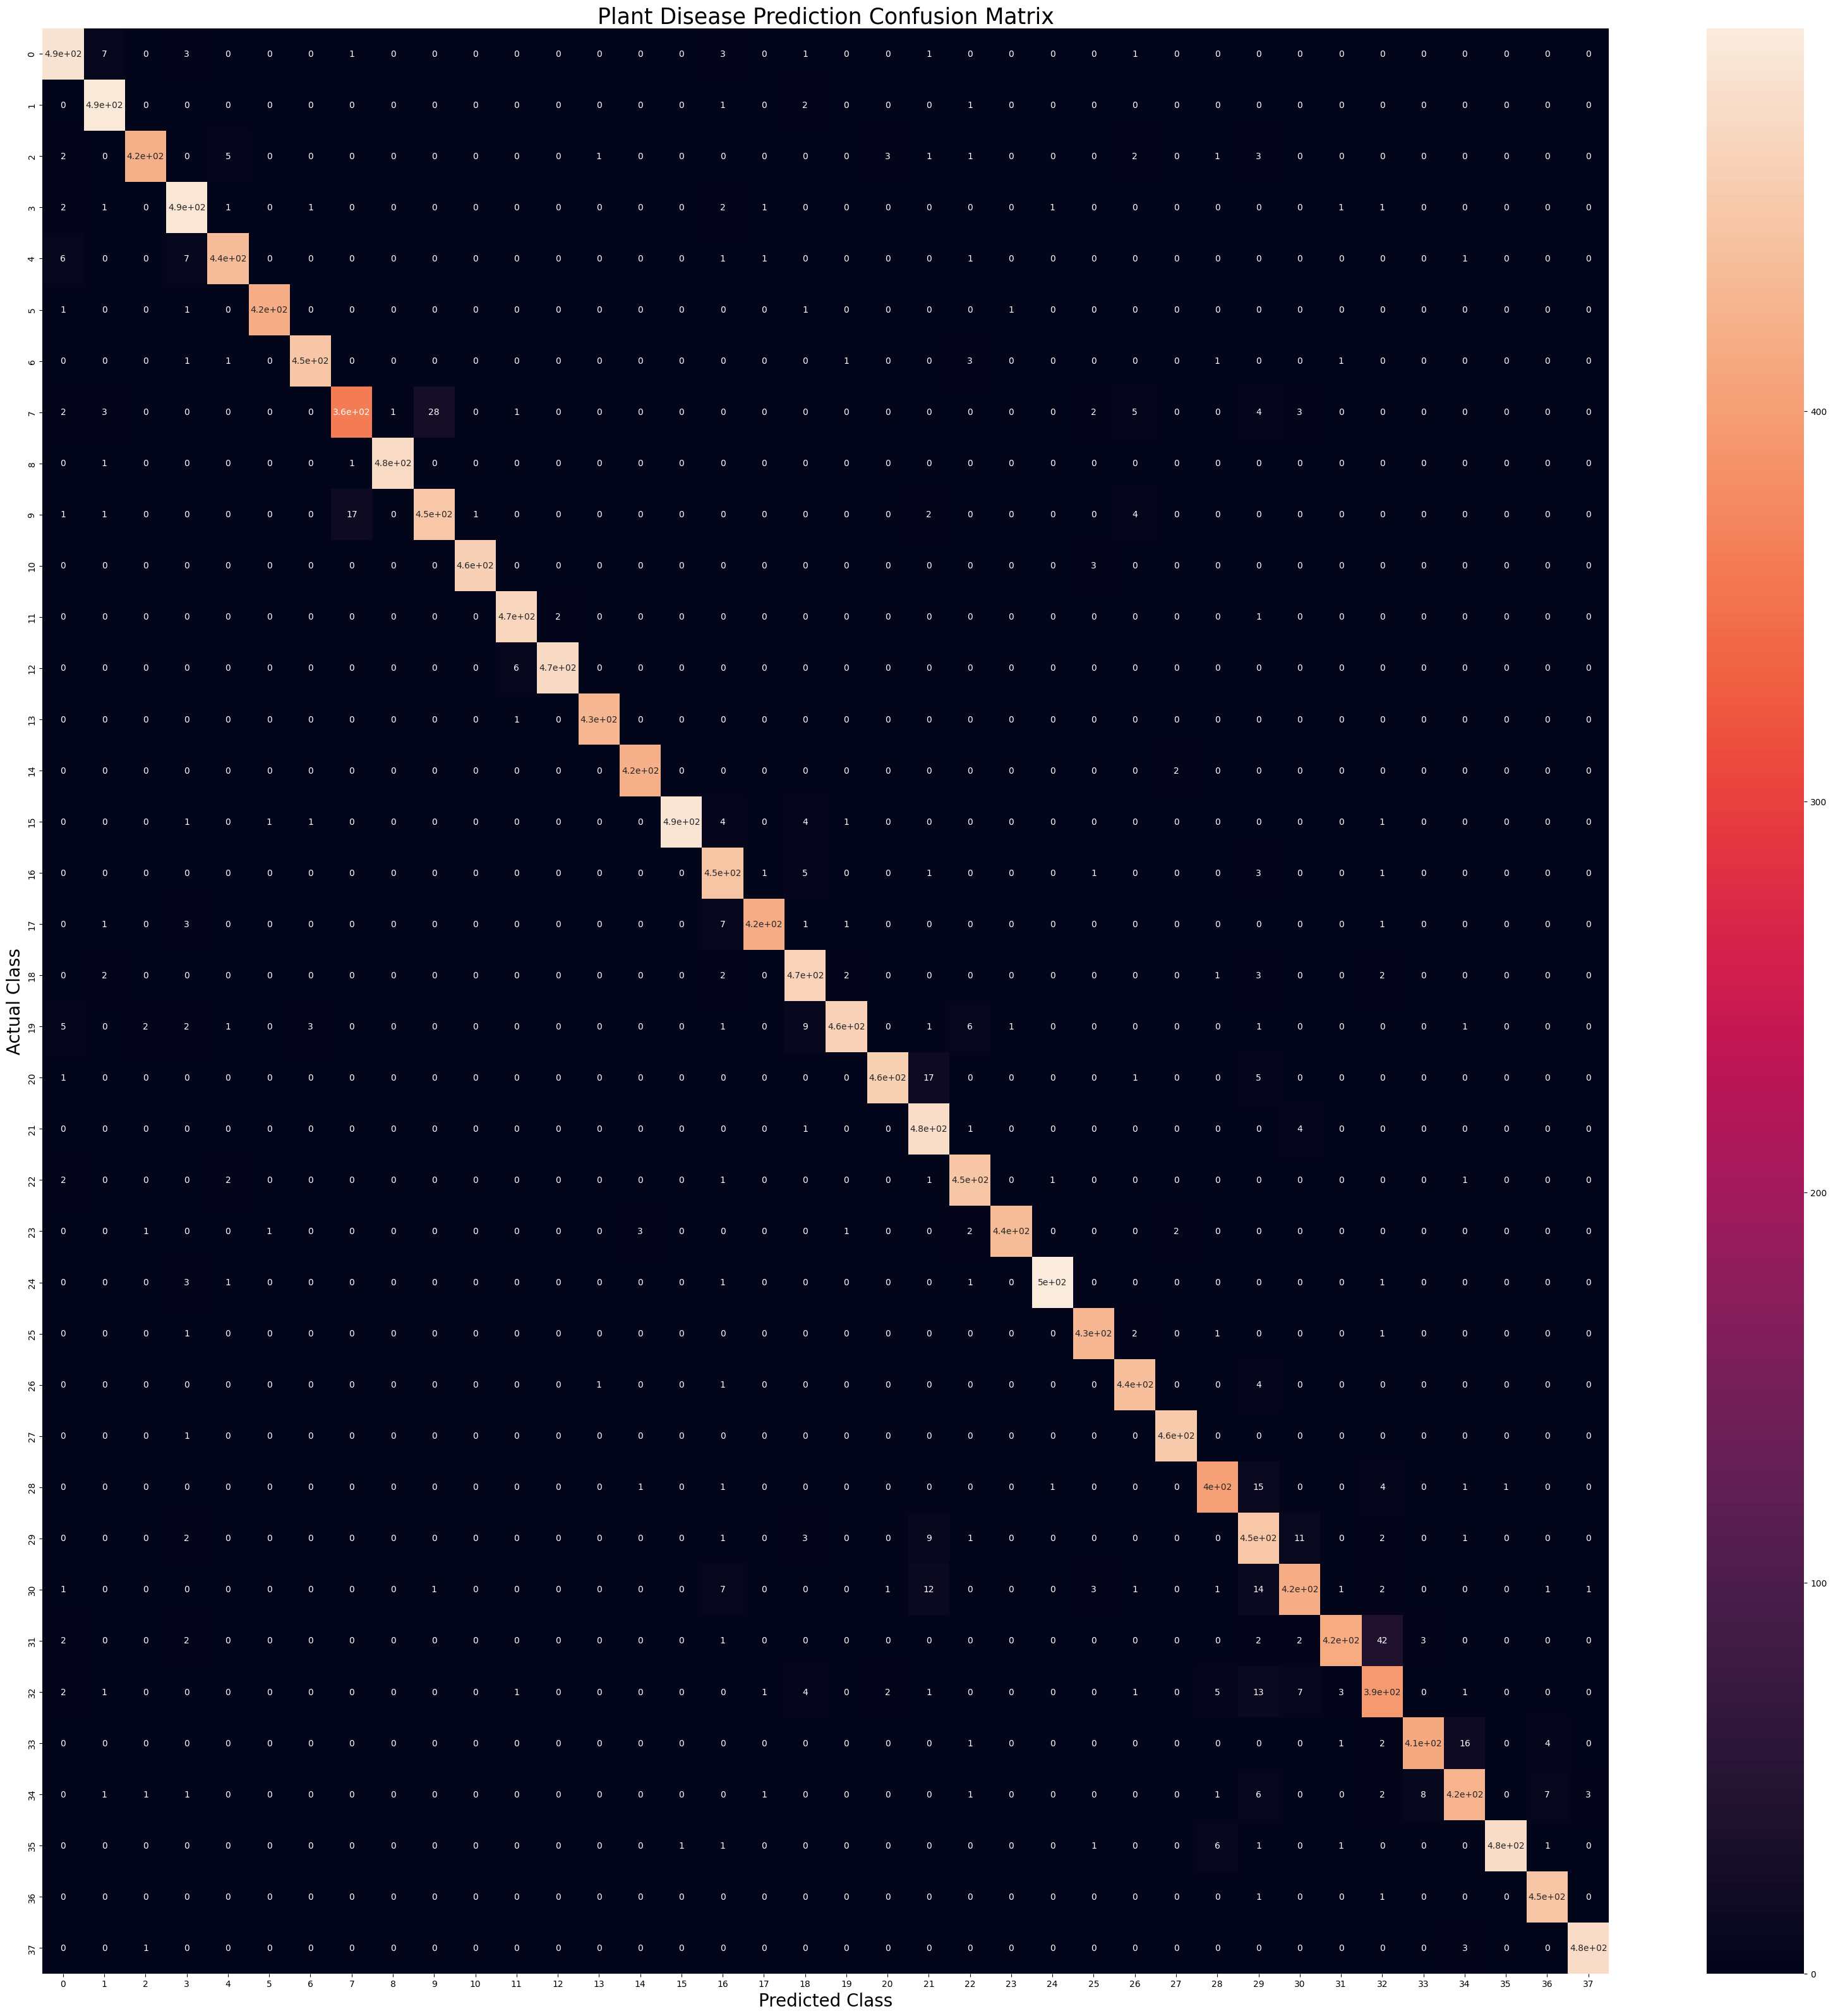

In [33]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

## Author 

### [Mohd Adnan Khan](https://www.linkedin.com/in/mohd-adnan--khan)